# Loan Status Prediction Model

## Importing Essential Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report

## Data Collection and Preprocessing

### Loading the Dataset

In [2]:
loan_df = pd.read_csv('loan_dataset.csv')

In [3]:
loan_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
loan_df.shape

(614, 13)

In [5]:
loan_df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


### Number of Null values in our Dataset

In [6]:
loan_df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [7]:
def gr_countplot(feature, data):
    plt.figure(figsize=(10,6))
    sns.countplot(x = feature, hue=feature, data=data, legend=True)
    plt.show()

In [8]:
def gr_histplot(feature, data):
    plt.figure(figsize=(10, 6))
    sns.histplot(x = feature, data=data, color='m', legend=True, kde=True)

## Imputing Categorical Features in the Dataset

### Replacing Null Values in Gender Feature with Mode value

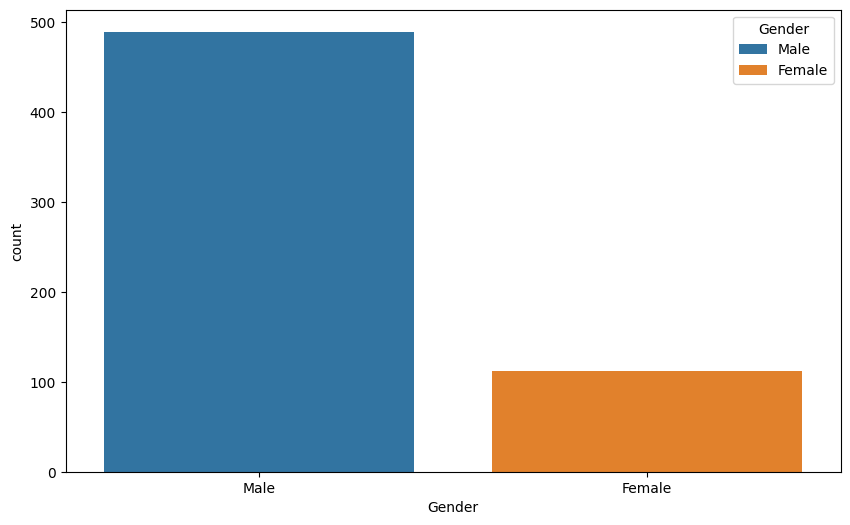

In [9]:
gr_countplot('Gender', loan_df)

In [10]:
loan_df['Gender'].mode()

0    Male
Name: Gender, dtype: object

In [11]:
pd.set_option('future.no_silent_downcasting', True)

loan_df['Gender'] = loan_df['Gender'].fillna(loan_df['Gender'].mode()[0])

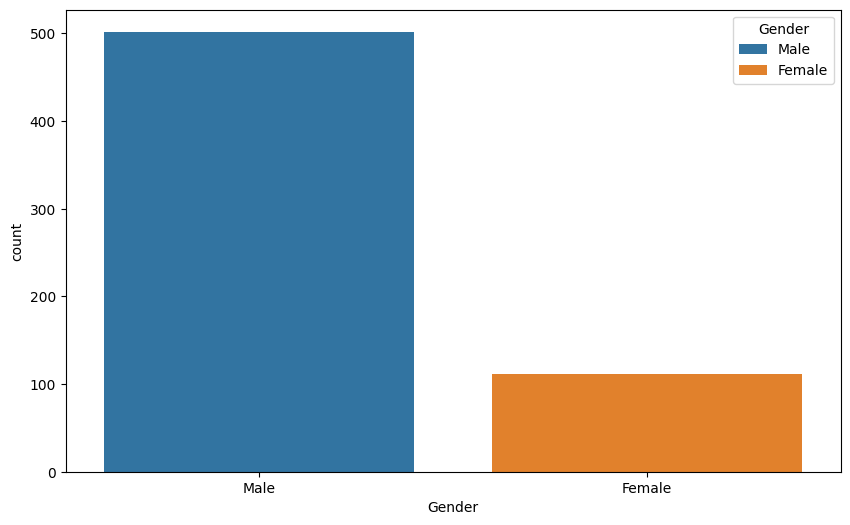

In [12]:
gr_countplot('Gender', loan_df)

### Replacing Null Values in Married Feature

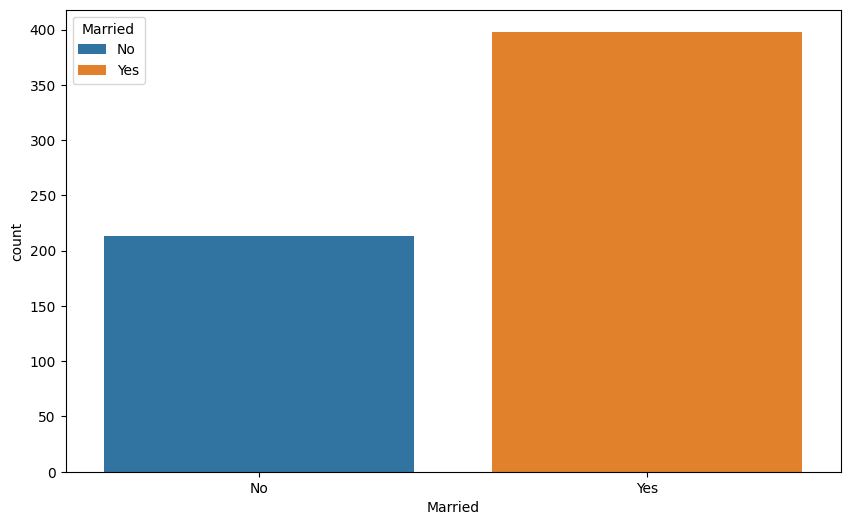

In [13]:
gr_countplot('Married', loan_df)

In [14]:
loan_df['Married'].mode()

0    Yes
Name: Married, dtype: object

In [15]:
loan_df['Married'] = loan_df['Married'].fillna(loan_df['Married'].mode()[0])

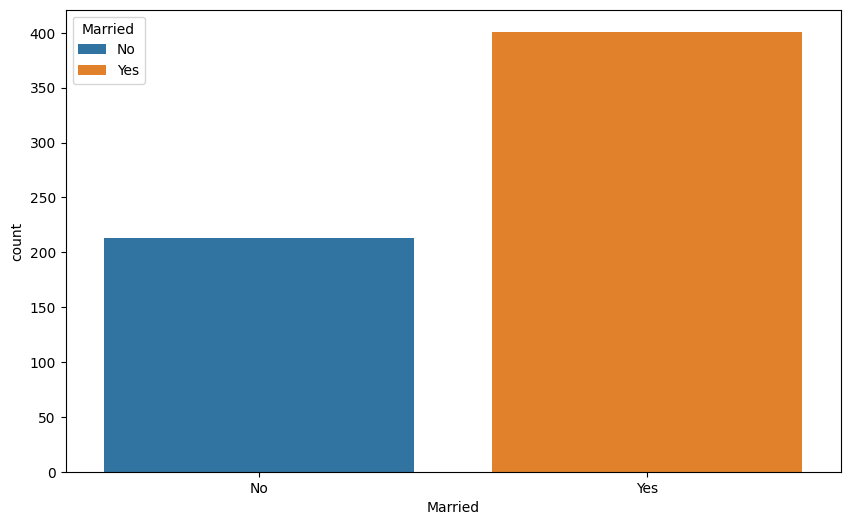

In [16]:
gr_countplot('Married', loan_df)

### Replacing Null Values in Self_Employed Feature

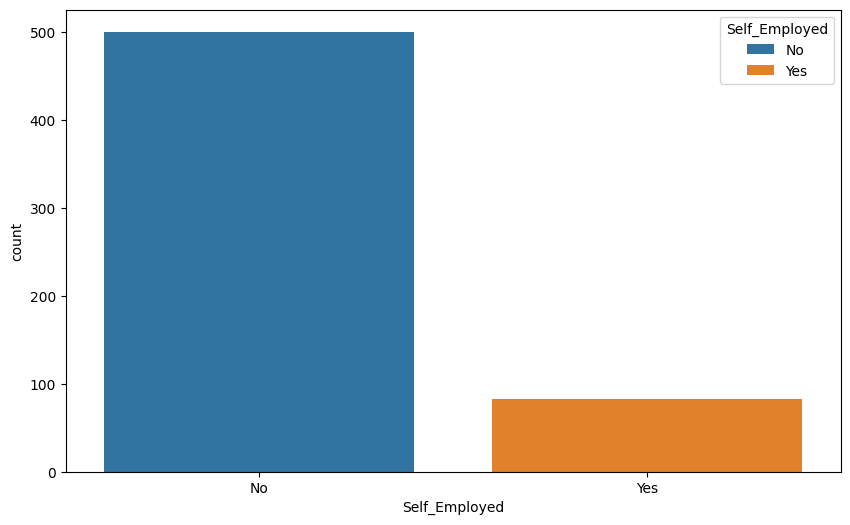

In [17]:
gr_countplot('Self_Employed', loan_df)

In [18]:
loan_df['Self_Employed'].mode()

0    No
Name: Self_Employed, dtype: object

In [19]:
loan_df['Self_Employed'] = loan_df['Self_Employed'].fillna(loan_df['Self_Employed'].mode()[0])

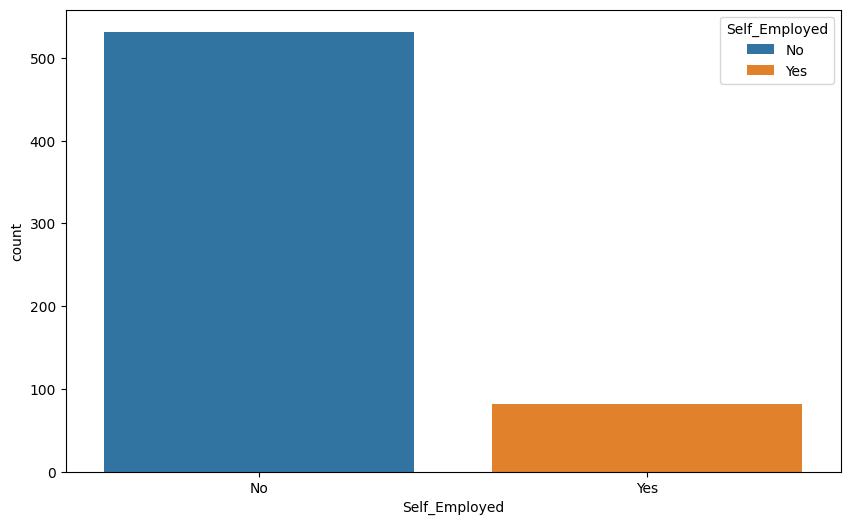

In [20]:
gr_countplot('Self_Employed', loan_df)

## Imputing Null Values in Numerical Features 

### Replacing Null Values in LoanAmount

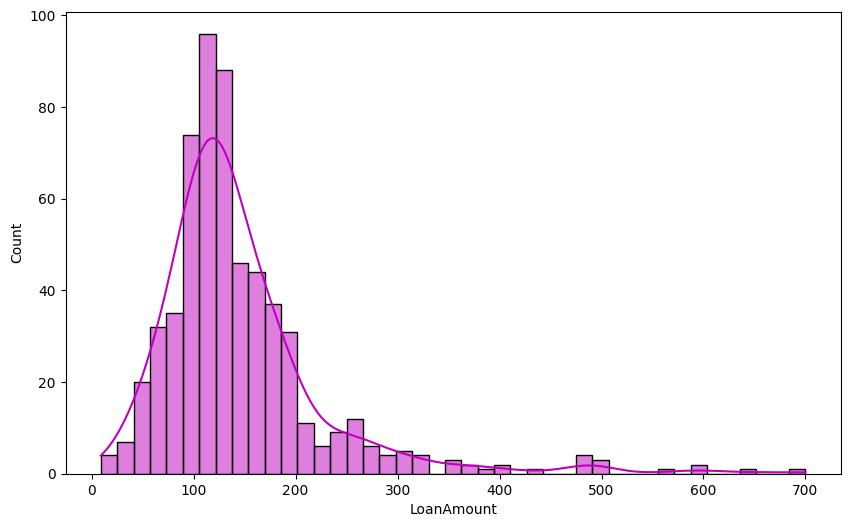

In [21]:
gr_histplot('LoanAmount', loan_df)

In [22]:
loan_df['LoanAmount'] = loan_df['LoanAmount'].fillna(loan_df['LoanAmount'].median())

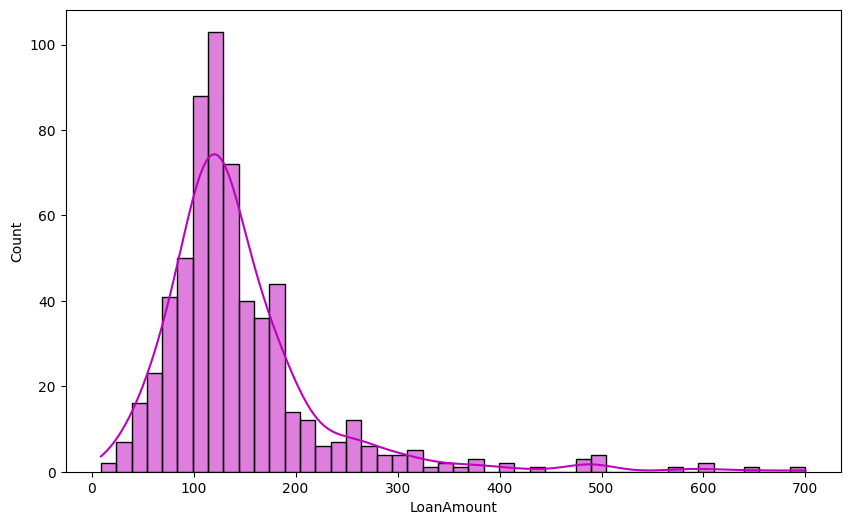

In [23]:
gr_histplot('LoanAmount', loan_df)

### Replacing Null Values in Loan_Amount_Term

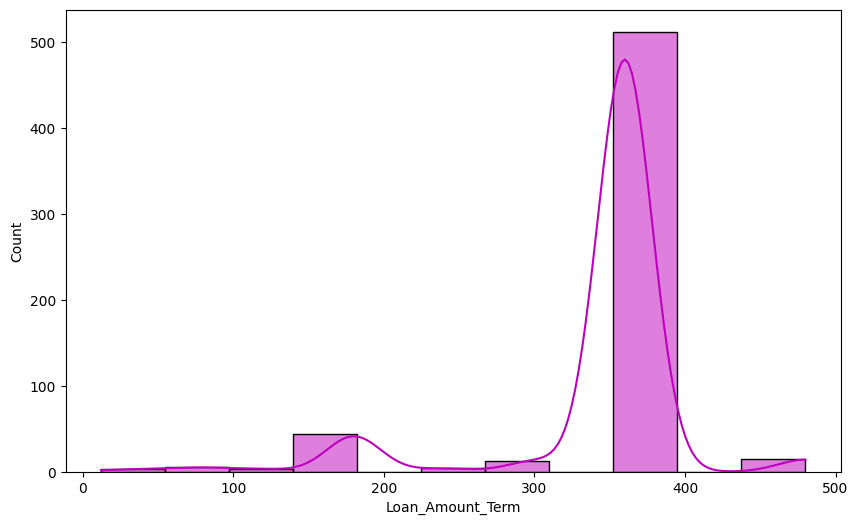

In [24]:
gr_histplot('Loan_Amount_Term', loan_df)

In [25]:
loan_df['Loan_Amount_Term'].value_counts()

Loan_Amount_Term
360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
60.0       2
36.0       2
12.0       1
Name: count, dtype: int64

In [26]:
loan_df['Loan_Amount_Term'] = loan_df['Loan_Amount_Term'].fillna(loan_df['Loan_Amount_Term'].mode()[0])

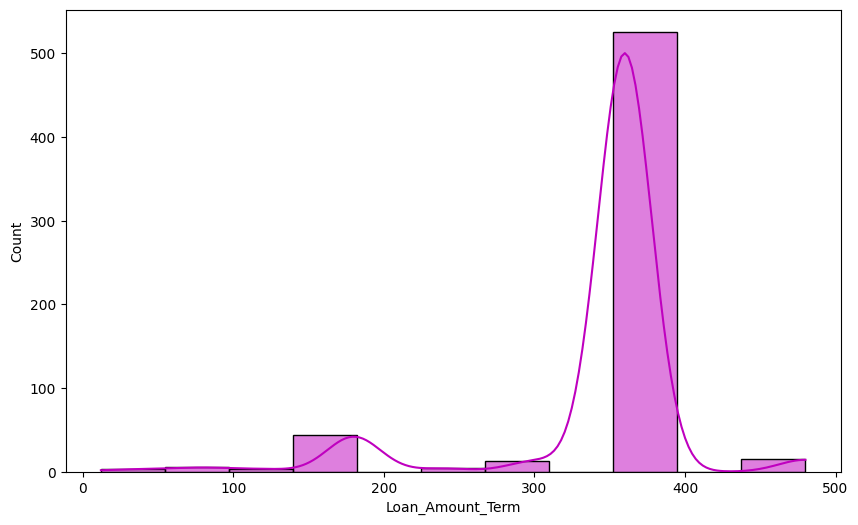

In [27]:
gr_histplot('Loan_Amount_Term', loan_df)

### Replacing the Null Values in Credit History

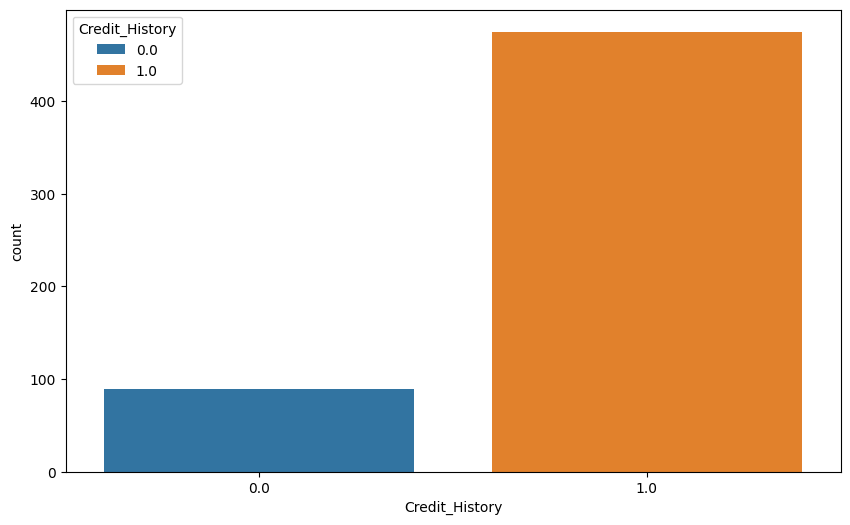

In [28]:
gr_countplot('Credit_History', loan_df)

In [29]:
loan_df['Credit_History'] = loan_df['Credit_History'].fillna(loan_df['Credit_History'].mode()[0])

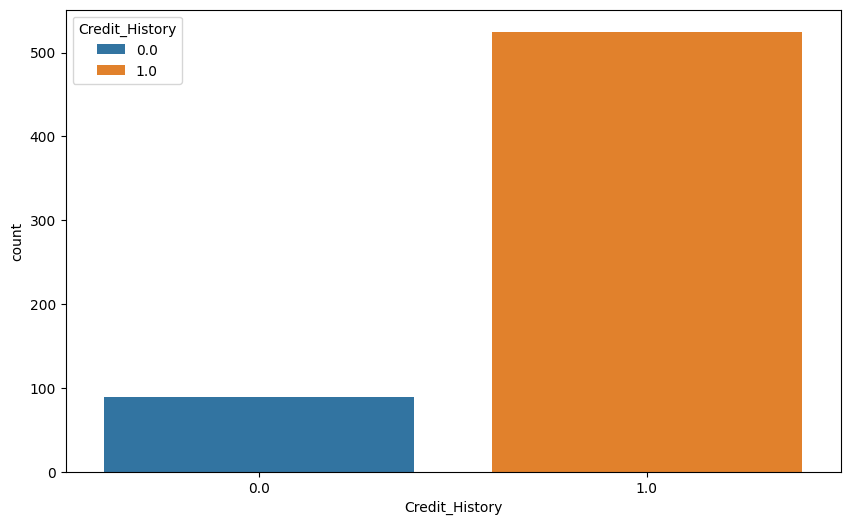

In [30]:
gr_countplot('Credit_History', loan_df)

### Replacing Null Values in Dependents

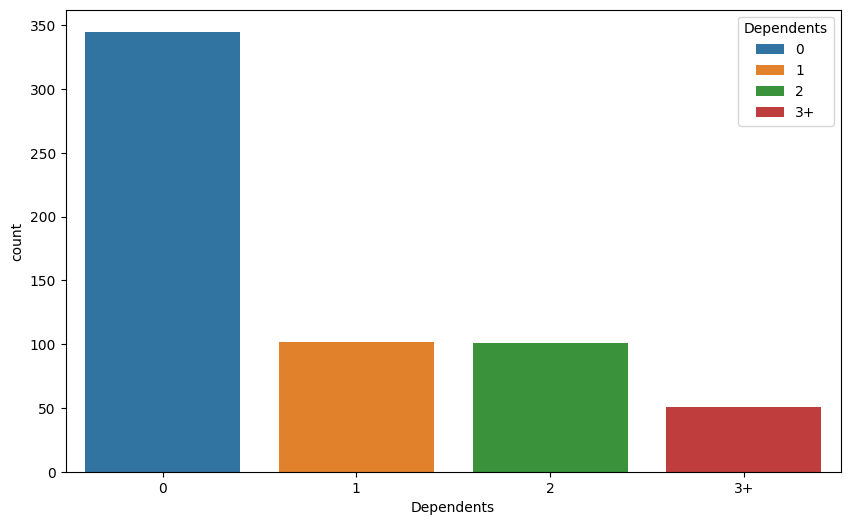

In [31]:
gr_countplot('Dependents', loan_df)

In [32]:
loan_df['Dependents'] = loan_df['Dependents'].fillna(loan_df['Dependents'].mode()[0])

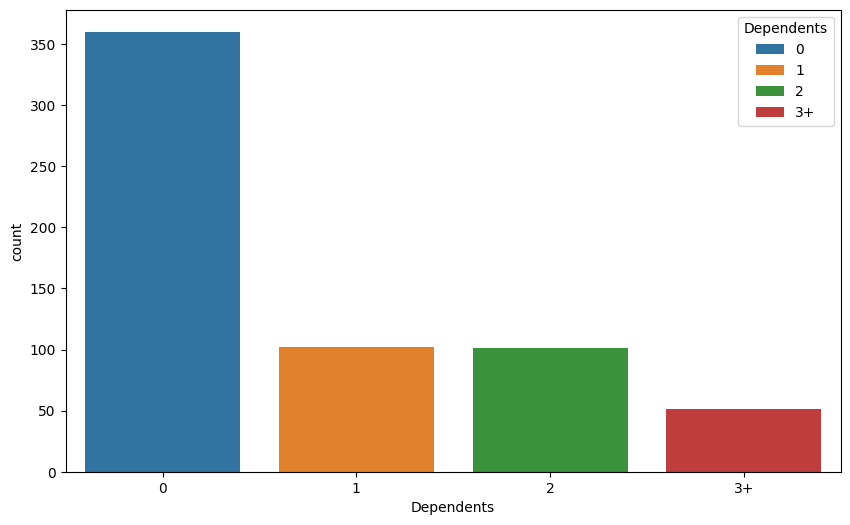

In [33]:
gr_countplot('Dependents', loan_df)

### Missing Values after Imputation

In [34]:
print("Missing Values =", loan_df.isnull().sum().sum())

Missing Values = 0


## Label Encoding

In [35]:
loan_df['Loan_Status'] = loan_df['Loan_Status'].replace({'Y': 1, 'N': 0}).astype('int64')

In [36]:
loan_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,1
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1


In [37]:
loan_df['Dependents'].value_counts()

Dependents
0     360
1     102
2     101
3+     51
Name: count, dtype: int64

### Replacing Dependents Feature Value

In [38]:
loan_df['Dependents'] = loan_df['Dependents'].replace('3+', 4).astype(int)

In [39]:
loan_df['Dependents'].value_counts()

Dependents
0    360
1    102
2    101
4     51
Name: count, dtype: int64

## Data Visualization

### Correlation Between Education and Loan Status

<Axes: xlabel='Education', ylabel='count'>

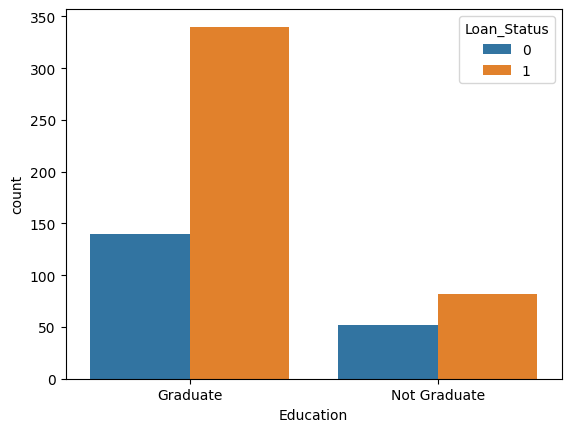

In [40]:
plt.Figure(figsize=(10,6))
sns.countplot(x = 'Education', hue='Loan_Status', data=loan_df)

### Correlation Between Marrital Status and Loan Status

<Axes: xlabel='Married', ylabel='count'>

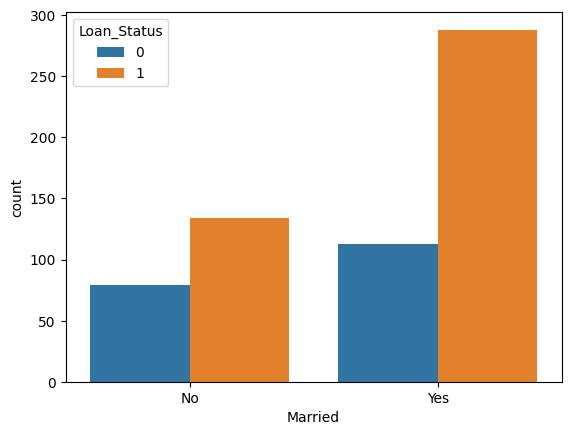

In [41]:
plt.Figure(figsize=(10,6))
sns.countplot(x = 'Married', hue='Loan_Status', data=loan_df)

### Correlation Between Gender and Loan Status

<Axes: xlabel='Gender', ylabel='count'>

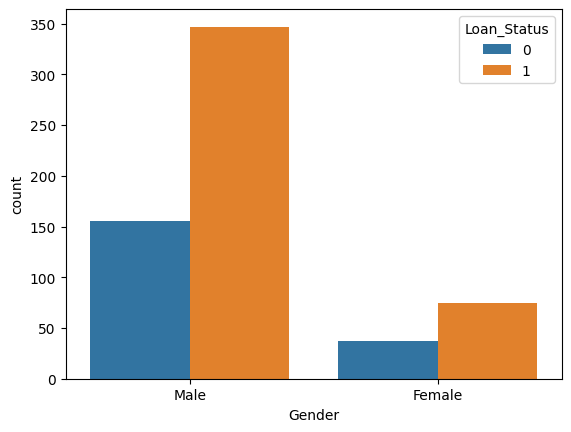

In [42]:
plt.Figure(figsize=(10,6))
sns.countplot(x = 'Gender', hue='Loan_Status', data=loan_df)

### Correlation Between Gender and Applicant Income

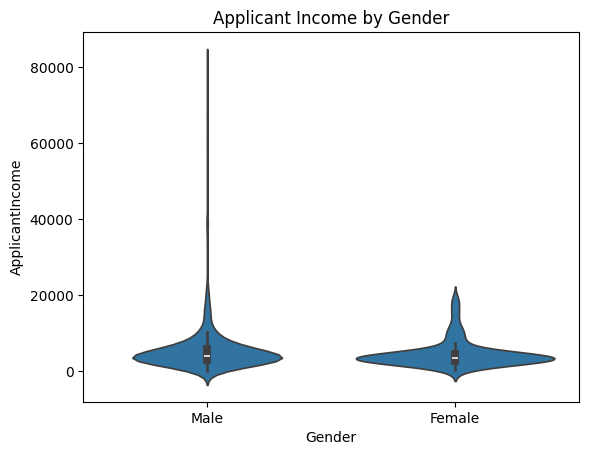

In [43]:
sns.violinplot(x='Gender', y='ApplicantIncome', data=loan_df)
plt.title('Applicant Income by Gender')
plt.show()


### Clipping the Outliers to the 95 Percentile

In [44]:
threshold = loan_df['ApplicantIncome'].quantile(0.95)
loan_df['ApplicantIncome'] = loan_df['ApplicantIncome'].clip(upper=threshold)


### Correlation Between Gender and Income after Clipping

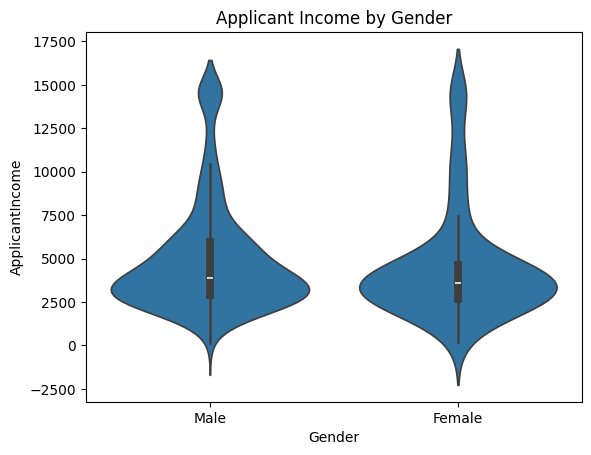

In [45]:
sns.violinplot(x='Gender', y='ApplicantIncome', data=loan_df)
plt.title('Applicant Income by Gender')
plt.show()


### Correlation Between Credit History and Loan Status

<Axes: xlabel='Credit_History', ylabel='count'>

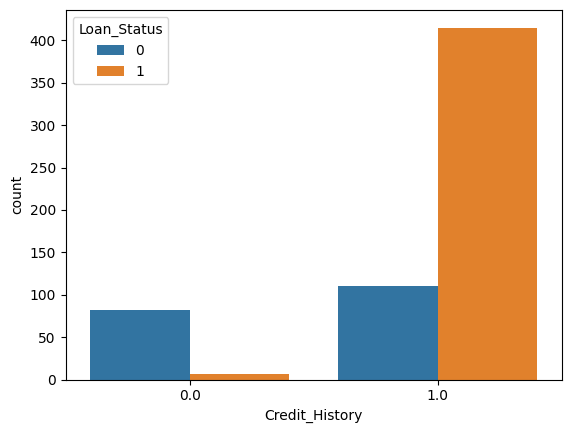

In [46]:
plt.Figure(figsize=(10,6))
sns.countplot(x = 'Credit_History', hue='Loan_Status', data=loan_df)

### Correlation Between Property Area and Loan Status

<Axes: xlabel='Property_Area', ylabel='count'>

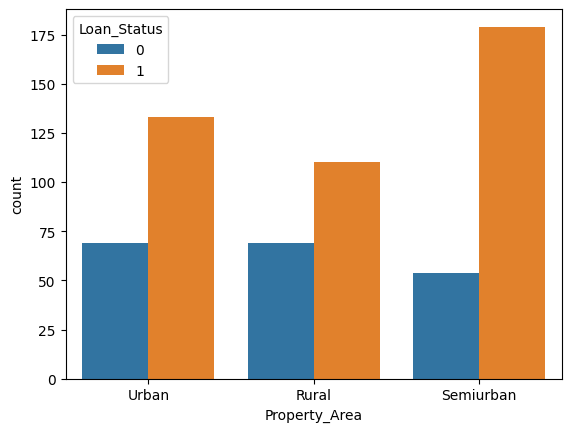

In [47]:
plt.Figure(figsize=(10,6))
sns.countplot(x = 'Property_Area', hue='Loan_Status', data=loan_df)

### Correlation Between Number of Dependents and Loan Status

<Axes: xlabel='Dependents', ylabel='count'>

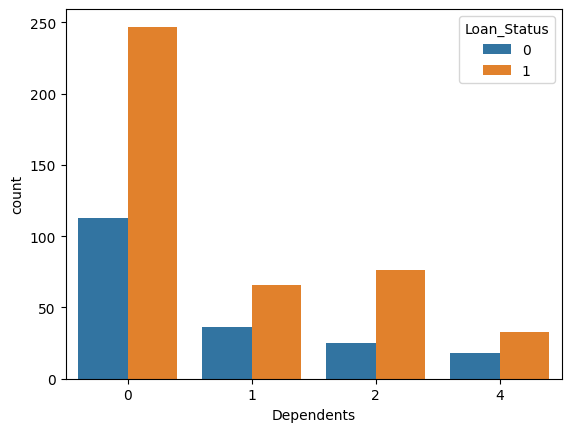

In [48]:
plt.Figure(figsize=(10,6))
sns.countplot(x = 'Dependents', hue='Loan_Status', data=loan_df)

## Converting Categorical Data to Numerical Data

In [49]:
'''Categorical Data -
Gender
Married
Education
Self_Employed
Property_Area'''

'Categorical Data -\nGender\nMarried\nEducation\nSelf_Employed\nProperty_Area'

In [50]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    object 
 2   Married            614 non-null    object 
 3   Dependents         614 non-null    int64  
 4   Education          614 non-null    object 
 5   Self_Employed      614 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    int64  
dtypes: float64(4), int64(3), object(6)
memory usage: 62.5+ KB


In [51]:
loan_df['Gender'] = loan_df['Gender'].replace({'Male': 1, 'Female': 0}).astype('int64')
loan_df['Married'] = loan_df['Married'].replace({'Yes': 1, 'No': 0}).astype('int64')
loan_df['Education'] = loan_df['Education'].replace({'Graduate': 1, 'Not Graduate': 0}).astype('int64')
loan_df['Self_Employed'] = loan_df['Self_Employed'].replace({'Yes': 1, 'No': 0}).astype('int64')
loan_df['Property_Area'] = loan_df['Property_Area'].replace({'Rural': 0, 'Semiurban': 1, 'Urban': 2}).astype('int64')

In [52]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    int64  
 2   Married            614 non-null    int64  
 3   Dependents         614 non-null    int64  
 4   Education          614 non-null    int64  
 5   Self_Employed      614 non-null    int64  
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    int64  
 12  Loan_Status        614 non-null    int64  
dtypes: float64(4), int64(8), object(1)
memory usage: 62.5+ KB


In [53]:
loan_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,1,0,5849,0.0,128.0,360.0,1.0,2,1
1,LP001003,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,2,1
3,LP001006,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,2,1
4,LP001008,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,2,1


## Separating the Data and Label

In [54]:
X = loan_df.drop(columns=['Loan_ID', 'Loan_Status'], axis=1)
Y = loan_df['Loan_Status']

In [55]:
X.shape, Y.shape

((614, 11), (614,))

## Splitting the Data into Training and Testing Data

In [56]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.22, stratify=Y, random_state=42)

In [57]:
X.shape, X_train.shape, X_test.shape

((614, 11), (478, 11), (136, 11))

## Standardizing the Data

In [58]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Converting Scaled Data Back to Dataframe

In [59]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X.columns)

## Training the Model

In [60]:
knn = KNeighborsClassifier(n_neighbors=9)
dec_tree = DecisionTreeClassifier()
logreg = LogisticRegression()
svc = SVC(kernel='linear', probability=True)
rforest = RandomForestClassifier()
xgc = XGBClassifier()
nbayes = GaussianNB()

In [61]:
models = [knn, dec_tree, logreg, svc, rforest, xgc, nbayes]

for model in models:
    model.fit(X_train_scaled, Y_train)
    print(f'Model: {model.__class__.__name__}')

    Y_train_pred = model.predict(X_train_scaled)
    Y_test_pred = model.predict(X_test)

    print('Training Accuracy Score:', accuracy_score(Y_train, Y_train_pred))
    print('Testing Accuracy Score:', accuracy_score(Y_test, Y_test_pred))

    if hasattr(model, 'predict_proba'):
        Y_train_pred_proba = model.predict_proba(X_train_scaled)[:, 1]
        Y_test_pred_proba = model.predict_proba(X_test)[:, 1]
        print('Training ROC AUC Score:', roc_auc_score(Y_train, Y_train_pred_proba))
        print('Testing ROC AUC Score:', roc_auc_score(Y_test, Y_test_pred_proba))
    else:
        print('ROC AUC Score not available for this model.')
    print()


Model: KNeighborsClassifier
Training Accuracy Score: 0.799163179916318
Testing Accuracy Score: 0.6764705882352942
Training ROC AUC Score: 0.8114175557414169
Testing ROC AUC Score: 0.4557389347336835

Model: DecisionTreeClassifier
Training Accuracy Score: 1.0
Testing Accuracy Score: 0.4411764705882353
Training ROC AUC Score: 1.0
Testing ROC AUC Score: 0.46636659164791205

Model: LogisticRegression
Training Accuracy Score: 0.799163179916318
Testing Accuracy Score: 0.3161764705882353
Training ROC AUC Score: 0.749821505069256
Testing ROC AUC Score: 0.42885721430357593

Model: SVC
Training Accuracy Score: 0.797071129707113
Testing Accuracy Score: 0.6985294117647058
Training ROC AUC Score: 0.686420105668999
Testing ROC AUC Score: 0.7406851712928232

Model: RandomForestClassifier
Training Accuracy Score: 1.0
Testing Accuracy Score: 0.5
Training ROC AUC Score: 0.9999999999999999
Testing ROC AUC Score: 0.46374093523380844

Model: XGBClassifier
Training Accuracy Score: 1.0
Testing Accuracy Score

## Applying PCA Since our Models shows Overfitting

In [62]:
pca = PCA(n_components=0.95)

X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

## Training Model on PCA Data

In [63]:
for model in models:
    model.fit(X_train_pca, Y_train)
    Y_test_pred = model.predict(X_test_pca)
    Y_train_pred = model.predict(X_train_pca)
    print(f'Model: {model.__class__.__name__}')

    print('Training Accuracy Score:', accuracy_score(Y_train, Y_train_pred))
    print('Testing Accuracy Score:', accuracy_score(Y_test, Y_test_pred))

    if hasattr(model, 'predict_proba'):
        Y_train_pred_proba = model.predict_proba(X_train_pca)[:, 1]
        Y_test_pred_proba = model.predict_proba(X_test_pca)[:, 1]
        print('Training ROC AUC Score:', roc_auc_score(Y_train, Y_train_pred_proba))
        print('Testing ROC AUC Score:', roc_auc_score(Y_test, Y_test_pred_proba))
    else:
        print('ROC AUC Score not available for this model.')
    print()

Model: KNeighborsClassifier
Training Accuracy Score: 0.801255230125523
Testing Accuracy Score: 0.8455882352941176
Training ROC AUC Score: 0.8093674139654434
Testing ROC AUC Score: 0.7839459864966242

Model: DecisionTreeClassifier
Training Accuracy Score: 1.0
Testing Accuracy Score: 0.75
Training ROC AUC Score: 1.0
Testing ROC AUC Score: 0.7171792948237059

Model: LogisticRegression
Training Accuracy Score: 0.797071129707113
Testing Accuracy Score: 0.8602941176470589
Training ROC AUC Score: 0.749597111442035
Testing ROC AUC Score: 0.8262065516379095

Model: SVC
Training Accuracy Score: 0.797071129707113
Testing Accuracy Score: 0.8529411764705882
Training ROC AUC Score: 0.7059015523959119
Testing ROC AUC Score: 0.7534383595898974

Model: RandomForestClassifier
Training Accuracy Score: 1.0
Testing Accuracy Score: 0.8235294117647058
Training ROC AUC Score: 1.0
Testing ROC AUC Score: 0.7975743935983997

Model: XGBClassifier
Training Accuracy Score: 1.0
Testing Accuracy Score: 0.764705882352

In [64]:
with open('loan_status_prediction_model.pkl', 'wb') as logreg_file:
    pickle.dump((pca, logreg, scaler), logreg_file)